In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
from config import weather_api_key

# Import the datetime module from the datetime library.
from datetime import datetime

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
pip install citipy

Note: you may need to restart the kernel to use updated packages.


In [5]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

645

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [8]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | jamestown
Processing Record 2 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 3 of Set 1 | avarua
Processing Record 4 of Set 1 | hilo
Processing Record 5 of Set 1 | bathsheba
Processing Record 6 of Set 1 | thompson
Processing Record 7 of Set 1 | bredasdorp
Processing Record 8 of Set 1 | pandavapura
Processing Record 9 of Set 1 | butaritari
Processing Record 10 of Set 1 | christchurch
Processing Record 11 of Set 1 | schwalmstadt
Processing Record 12 of Set 1 | upernavik
Processing Record 13 of Set 1 | necochea
Processing Record 14 of Set 1 | tuatapere
Processing Record 15 of Set 1 | ponta do sol
Processing Record 16 of Set 1 | puerto ayora
Processing Record 17 of Set 1 | khandyga
Processing Record 18 of Set 1 | tuktoyaktuk
Processing Record 19 of Set 1 | tiksi
Processing Record 20 of Set 1 | qaanaaq
Processing Record 21 of Set 1 | busselton
Processing Record 22 of Set 1 |

Processing Record 39 of Set 4 | cherskiy
Processing Record 40 of Set 4 | eichenzell
Processing Record 41 of Set 4 | staraya stanitsa
Processing Record 42 of Set 4 | velez-malaga
Processing Record 43 of Set 4 | touros
Processing Record 44 of Set 4 | venice
Processing Record 45 of Set 4 | mergui
City not found. Skipping...
Processing Record 46 of Set 4 | arraial do cabo
Processing Record 47 of Set 4 | mecca
Processing Record 48 of Set 4 | nome
Processing Record 49 of Set 4 | fredericksburg
Processing Record 50 of Set 4 | berlevag
Processing Record 1 of Set 5 | krasnoselkup
Processing Record 2 of Set 5 | kahului
Processing Record 3 of Set 5 | davlekanovo
Processing Record 4 of Set 5 | freeport
Processing Record 5 of Set 5 | san lorenzo
Processing Record 6 of Set 5 | yellowknife
Processing Record 7 of Set 5 | coquimbo
Processing Record 8 of Set 5 | port keats
Processing Record 9 of Set 5 | carnarvon
Processing Record 10 of Set 5 | balakhta
Processing Record 11 of Set 5 | sao filipe
Process

Processing Record 28 of Set 8 | tazovskiy
Processing Record 29 of Set 8 | tuggurt
City not found. Skipping...
Processing Record 30 of Set 8 | krasnyy kut
Processing Record 31 of Set 8 | batagay-alyta
Processing Record 32 of Set 8 | sorong
Processing Record 33 of Set 8 | vylgort
City not found. Skipping...
Processing Record 34 of Set 8 | norrtalje
Processing Record 35 of Set 8 | belfast
Processing Record 36 of Set 8 | zhigansk
Processing Record 37 of Set 8 | trinidad
Processing Record 38 of Set 8 | alice springs
Processing Record 39 of Set 8 | banska stiavnica
Processing Record 40 of Set 8 | namibe
Processing Record 41 of Set 8 | villefranche-de-rouergue
Processing Record 42 of Set 8 | dingle
Processing Record 43 of Set 8 | araguaina
Processing Record 44 of Set 8 | myronivka
Processing Record 45 of Set 8 | santa marta
Processing Record 46 of Set 8 | meadow lake
Processing Record 47 of Set 8 | riyadh
Processing Record 48 of Set 8 | ojinaga
Processing Record 49 of Set 8 | gumdag
Processin

Processing Record 18 of Set 12 | davila
Processing Record 19 of Set 12 | cairns
Processing Record 20 of Set 12 | portree
Processing Record 21 of Set 12 | casper
Processing Record 22 of Set 12 | aripuana
Processing Record 23 of Set 12 | fortuna
Processing Record 24 of Set 12 | kashi
Processing Record 25 of Set 12 | wanderlandia
City not found. Skipping...
Processing Record 26 of Set 12 | carutapera
Processing Record 27 of Set 12 | nishihara
Processing Record 28 of Set 12 | esmeraldas
Processing Record 29 of Set 12 | victoria
Processing Record 30 of Set 12 | port-cartier
Processing Record 31 of Set 12 | nepomuceno
Processing Record 32 of Set 12 | los andes
Processing Record 33 of Set 12 | noyabrsk
Processing Record 34 of Set 12 | taoudenni
Processing Record 35 of Set 12 | las vegas
Processing Record 36 of Set 12 | murakami
Processing Record 37 of Set 12 | fomboni
Processing Record 38 of Set 12 | nola
Processing Record 39 of Set 12 | sumbawa
City not found. Skipping...
Processing Record 4

In [9]:
len(city_data)

594

In [18]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Jamestown,42.0970,-79.2353,63.99,88,90,7.00,US,2021-10-09 23:50:47
1,Avarua,-21.2078,-159.7750,78.85,57,40,8.05,CK,2021-10-09 23:55:30
2,Hilo,19.7297,-155.0900,79.79,87,90,8.05,US,2021-10-09 23:55:30
3,Bathsheba,13.2167,-59.5167,75.81,94,75,5.75,BB,2021-10-09 23:55:30
4,Thompson,55.7435,-97.8558,51.96,50,20,5.75,CA,2021-10-09 23:55:31
5,Bredasdorp,-34.5322,20.0403,47.52,93,1,1.14,ZA,2021-10-09 23:55:31
6,Pandavapura,12.5006,76.6733,68.88,95,99,5.23,IN,2021-10-09 23:55:31
7,Butaritari,3.0707,172.7902,81.59,73,92,12.37,KI,2021-10-09 23:55:32
8,Christchurch,-43.5333,172.6333,63.32,65,40,1.99,NZ,2021-10-09 23:55:18
9,Schwalmstadt,50.9333,9.2167,43.81,81,36,1.77,DE,2021-10-09 23:55:32


In [19]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Jamestown,US,2021-10-09 23:50:47,42.0970,-79.2353,63.99,88,90,7.00
1,Avarua,CK,2021-10-09 23:55:30,-21.2078,-159.7750,78.85,57,40,8.05
2,Hilo,US,2021-10-09 23:55:30,19.7297,-155.0900,79.79,87,90,8.05
3,Bathsheba,BB,2021-10-09 23:55:30,13.2167,-59.5167,75.81,94,75,5.75
4,Thompson,CA,2021-10-09 23:55:31,55.7435,-97.8558,51.96,50,20,5.75
...,...,...,...,...,...,...,...,...,...
589,Gnjilane,XK,2021-10-09 23:58:49,42.4604,21.4699,45.59,91,100,2.91
590,Muravlenko,RU,2021-10-09 23:56:35,63.7898,74.5230,26.10,79,70,16.37
591,Keffi,NG,2021-10-09 23:58:49,8.8486,7.8736,75.58,90,96,2.59
592,Bandar-E Lengeh,IR,2021-10-09 23:58:49,26.5579,54.8807,84.61,73,0,0.47


In [20]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [21]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

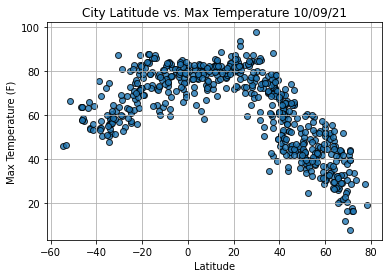

In [22]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

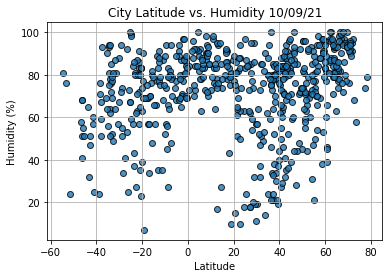

In [23]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

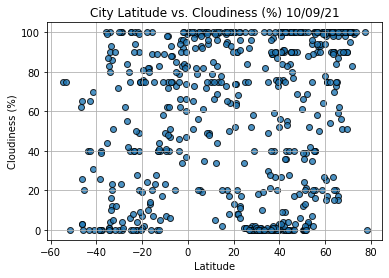

In [24]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

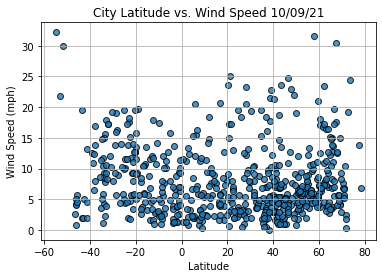

In [25]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()